## Temperatures

In [2]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

/home/andres/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
temperature_files = glob.glob(os.path.join('meteo', '*.csv'))
temperature_files

['meteo/jun_meteo23.csv',
 'meteo/abr_meteo23.csv',
 'meteo/sep_meteo23.csv',
 'meteo/may_meto_23.csv',
 'meteo/Estaciones_control_datos_meteorologicos.csv',
 'meteo/jul_meteo23.csv',
 'meteo/ago_meteo23.csv',
 'meteo/oct_meteo23.csv']

In [4]:
filtered_files = [file for file in temperature_files if any(month in os.path.basename(file) for month in ['jun', 'jul', 'ago'])]
filtered_files

['meteo/jun_meteo23.csv', 'meteo/jul_meteo23.csv', 'meteo/ago_meteo23.csv']

In [5]:
all_dataframes = [pd.read_csv(csv_file, delimiter=';') for csv_file in filtered_files]
temperatures = pd.concat(all_dataframes, ignore_index=True)
temperatures.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,81,28079102_81_98,2023,6,1,2.92,V,...,3.33,V,1.75,V,3.03,V,2.30,V,2.17,V
1,28,79,102,81,28079102_81_98,2023,6,2,0.88,V,...,2.77,V,5.35,V,2.90,V,1.03,V,1.45,V
2,28,79,102,81,28079102_81_98,2023,6,3,1.45,V,...,1.73,V,6.98,V,4.40,V,4.43,V,1.28,V
3,28,79,102,81,28079102_81_98,2023,6,4,0.62,V,...,3.18,V,3.53,V,2.72,V,1.70,V,2.12,V
4,28,79,102,81,28079102_81_98,2023,6,5,2.22,V,...,3.33,V,4.42,V,3.45,V,1.68,V,0.93,V


In [6]:
temperatures = temperatures[(temperatures['MAGNITUD'] == 83)]
temperatures.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
60,28,79,102,83,28079102_83_98,2023,6,1,14.7,V,...,12.3,V,12.1,V,11.4,V,11.3,V,11.3,V
61,28,79,102,83,28079102_83_98,2023,6,2,11.1,V,...,18.0,V,15.9,V,15.2,V,14.1,V,13.3,V
62,28,79,102,83,28079102_83_98,2023,6,3,12.6,V,...,20.9,V,16.1,V,15.5,V,14.8,V,14.8,V
63,28,79,102,83,28079102_83_98,2023,6,4,15.0,V,...,20.3,V,18.0,V,15.9,V,16.0,V,15.6,V
64,28,79,102,83,28079102_83_98,2023,6,5,15.3,V,...,16.7,V,15.2,V,14.7,V,14.3,V,14.2,V


In [7]:
melted = temperatures.melt(
    id_vars=['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO', 'ANO', 'MES', 'DIA'],
    value_vars=[f'H{i:02}' for i in range(1, 25)],
    var_name='HOUR',
    value_name='TEMPERATURE'
)
melted.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,HOUR,TEMPERATURE
0,28,79,102,83,28079102_83_98,2023,6,1,H01,14.7
1,28,79,102,83,28079102_83_98,2023,6,2,H01,11.1
2,28,79,102,83,28079102_83_98,2023,6,3,H01,12.6
3,28,79,102,83,28079102_83_98,2023,6,4,H01,15.0
4,28,79,102,83,28079102_83_98,2023,6,5,H01,15.3


In [8]:
validity = temperatures.melt(
    id_vars=["PROVINCIA", "MUNICIPIO", "ESTACION", "MAGNITUD", "PUNTO_MUESTREO", "ANO", "MES", "DIA"],
    value_vars=[f"V{i:02}" for i in range(1, 25)],
    var_name="HOUR_VALID",
    value_name="VALIDITY"
)
validity.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,HOUR_VALID,VALIDITY
0,28,79,102,83,28079102_83_98,2023,6,1,V01,V
1,28,79,102,83,28079102_83_98,2023,6,2,V01,V
2,28,79,102,83,28079102_83_98,2023,6,3,V01,V
3,28,79,102,83,28079102_83_98,2023,6,4,V01,V
4,28,79,102,83,28079102_83_98,2023,6,5,V01,V


In [9]:
# Merge melted data with validity information
melted["VALIDITY"] = validity["VALIDITY"]

# Filter out invalid rows
filtered = melted[melted["VALIDITY"] == "V"].copy()
filtered.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,HOUR,TEMPERATURE,VALIDITY
0,28,79,102,83,28079102_83_98,2023,6,1,H01,14.7,V
1,28,79,102,83,28079102_83_98,2023,6,2,H01,11.1,V
2,28,79,102,83,28079102_83_98,2023,6,3,H01,12.6,V
3,28,79,102,83,28079102_83_98,2023,6,4,H01,15.0,V
4,28,79,102,83,28079102_83_98,2023,6,5,H01,15.3,V


In [10]:
# Extract hour as a numeric value
filtered["HOUR"] = filtered["HOUR"].str.extract(r"(\d+)").astype(int)
filtered.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,HOUR,TEMPERATURE,VALIDITY
0,28,79,102,83,28079102_83_98,2023,6,1,1,14.7,V
1,28,79,102,83,28079102_83_98,2023,6,2,1,11.1,V
2,28,79,102,83,28079102_83_98,2023,6,3,1,12.6,V
3,28,79,102,83,28079102_83_98,2023,6,4,1,15.0,V
4,28,79,102,83,28079102_83_98,2023,6,5,1,15.3,V


In [11]:
# Drop the validity column as it's no longer needed
filtered = filtered.drop(columns=['PROVINCIA','MUNICIPIO','MAGNITUD','PUNTO_MUESTREO','VALIDITY'])

# Reset index for a clean DataFrame
filtered = filtered.reset_index(drop=True)
filtered.head()

,ESTACION,ANO,MES,DIA,HOUR,TEMPERATURE
0,102,2023,6,1,1,14.7
1,102,2023,6,2,1,11.1
2,102,2023,6,3,1,12.6
3,102,2023,6,4,1,15.0
4,102,2023,6,5,1,15.3


In [12]:
filtered.columns = ['station', 'year', 'month', 'day', 'time', 'temp']
filtered.head()

,station,year,month,day,time,temp
0,102,2023,6,1,1,14.7
1,102,2023,6,2,1,11.1
2,102,2023,6,3,1,12.6
3,102,2023,6,4,1,15.0
4,102,2023,6,5,1,15.3


In [13]:
# Sort the dataframe by the 'date' column
filtered = filtered.sort_values(by=['year', 'month', 'day', 'time', 'station'])

# Reset index
filtered = filtered.reset_index(drop=True)
filtered.head()

,station,year,month,day,time,temp
0,4,2023,6,1,1,19.3
1,8,2023,6,1,1,18.6
2,16,2023,6,1,1,18.7
3,18,2023,6,1,1,19.0
4,24,2023,6,1,1,18.1


In [14]:
# For each time compute difference between each station and station 58, and then compute average temperature value for each station
station = 106
df_ref = filtered[filtered['station'] == station][['year', 'month', 'day', 'time', 'temp']].rename(columns={'temp': 'temp_ref'})
df_merged = pd.merge(filtered, df_ref, on=['year', 'month', 'day', 'time'])
df_merged

,station,year,month,day,time,temp,temp_ref
0,4,2023,6,1,1,19.3,16.7
1,8,2023,6,1,1,18.6,16.7
2,16,2023,6,1,1,18.7,16.7
3,18,2023,6,1,1,19.0,16.7
4,24,2023,6,1,1,18.1,16.7
...,...,...,...,...,...,...,...
45104,111,2023,8,22,3,30.0,23.2
45105,112,2023,8,22,3,30.5,23.2
45106,113,2023,8,22,3,31.0,23.2
45107,114,2023,8,22,3,30.1,23.2


In [15]:
# Compute the daily temperature difference from station 58 for each station
df_merged['temp_diff'] = df_merged['temp'] - df_merged['temp_ref']
df_merged

,station,year,month,day,time,temp,temp_ref,temp_diff
0,4,2023,6,1,1,19.3,16.7,2.6
1,8,2023,6,1,1,18.6,16.7,1.9
2,16,2023,6,1,1,18.7,16.7,2.0
3,18,2023,6,1,1,19.0,16.7,2.3
4,24,2023,6,1,1,18.1,16.7,1.4
...,...,...,...,...,...,...,...,...
45104,111,2023,8,22,3,30.0,23.2,6.8
45105,112,2023,8,22,3,30.5,23.2,7.3
45106,113,2023,8,22,3,31.0,23.2,7.8
45107,114,2023,8,22,3,30.1,23.2,6.9


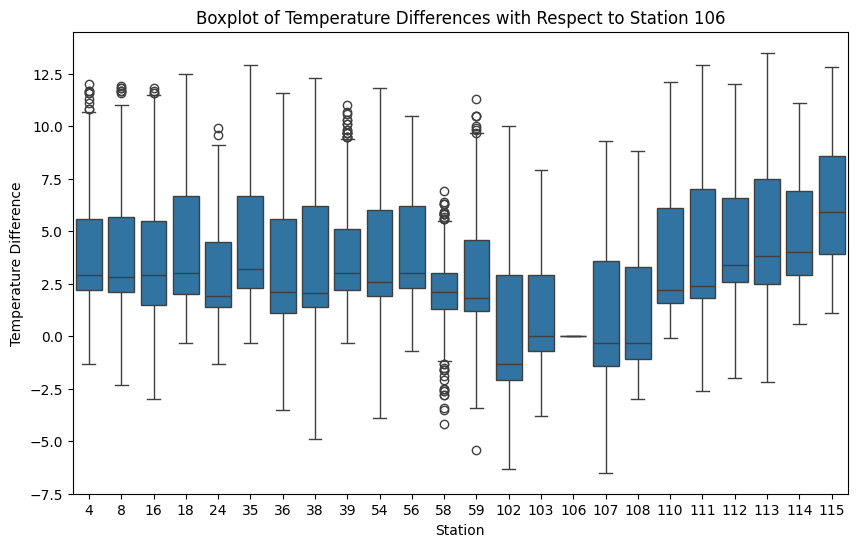

In [16]:
df_filtered = df_merged

# Create a boxplot for each station showing the temperature differences
plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='temp_diff', data=df_filtered)

plt.title('Boxplot of Temperature Differences with Respect to Station ' + str(station))
plt.xlabel('Station')
plt.ylabel('Temperature Difference')

plt.show()

In [32]:
df_filtered = df_filtered.groupby('station')['temp_diff'].mean().reset_index()
df_filtered

,station,temp_diff
0,4,1.711967
1,8,1.736763
2,16,1.490390
3,18,2.095828
4,24,0.775764
5,35,2.374093
6,36,1.177516
7,38,1.591819
8,39,1.551949
9,54,1.752720


## Stations

In [33]:
stations = pd.read_csv('meteo/Estaciones_control_datos_meteorologicos.csv', delimiter=';')
stations.head()

,CÓDIGO,CÓDIGO_CORTO,ESTACIÓN,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,VV (81),DV (82),T (83),...,P (89),COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,NUM_VIA,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD
0,28079004,4,Plaza España,Plaza de España,"3°42'43.91""O","40°25'25.98""N",637,NaN,NaN,X,...,NaN,273600.0,PLAZA,DE,ESPAÑA,NaN,"439579,3291","4475049,263",-37.122.567,404.238.823
1,28079008,8,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3°40'56.22""O","40°25'17.63""N",672,NaN,NaN,X,...,NaN,18900.0,CALLE,DE,ALCALA,NaN,"442117,2366","4474770,696",-36.823.158,404.215.533
2,28079016,16,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3°38'21.17""O","40°26'24.20""N",695,NaN,NaN,X,...,NaN,798700.0,CALLE,DEL,VIZCONDE DE LOS ASILOS,NaN,"445786,1729","4476796,019",-36.392.422,404.400.457
3,28079018,18,Farolillo,Calle Farolillo - C/Ervigio,"3°43'54.61""O","40°23'41.22""N",632,NaN,NaN,X,...,NaN,1903.0,CALLE,DEL,FAROLILLO,NaN,"437891,6961","4471832,769",-37.318.356,403.947.825
4,28079024,24,Casa de Campo,Casa de Campo (Terminal del Teleférico),"3°44'50.44""O","40°25'9.69""N",646,X,X,X,...,X,905219.0,CARRETERA,DEL,TELEFERICO,NaN,"436598,5637","4474571,618",-37.473.445,404.193.577


In [34]:
stations = stations[['CÓDIGO_CORTO', 'COORDENADA_X_ETRS89', 'COORDENADA_Y_ETRS89']]
stations.head()

,CÓDIGO_CORTO,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89
0,4,"439579,3291","4475049,263"
1,8,"442117,2366","4474770,696"
2,16,"445786,1729","4476796,019"
3,18,"437891,6961","4471832,769"
4,24,"436598,5637","4474571,618"


In [35]:
stations.columns = ['station', 'lat', 'lon']
stations.head()

,station,lat,lon
0,4,"439579,3291","4475049,263"
1,8,"442117,2366","4474770,696"
2,16,"445786,1729","4476796,019"
3,18,"437891,6961","4471832,769"
4,24,"436598,5637","4474571,618"


In [36]:
from pyproj import Transformer

# Transform coordinates from ETRS89 to WRS84
transformer = Transformer.from_crs('EPSG:25830', 'EPSG:4326')

# Iterate over each station
for index, station in stations.iterrows():
    xx = float(station['lat'].replace(',', '.'))
    yy = float(station['lon'].replace(',', '.'))
    lat, lon = transformer.transform(xx, yy)
    # Update coordinates in dataset
    stations.at[index, 'lat'] = lat
    stations.at[index, 'lon'] = lon

In [37]:
stations.head()

,station,lat,lon
0,4,40.423882,-3.712257
1,8,40.421553,-3.682316
2,16,40.440046,-3.639242
3,18,40.394782,-3.731836
4,24,40.419358,-3.747344


## Merged dataframe

In [38]:
temperatures = pd.merge(df_filtered, stations, on='station')
temperatures

,station,temp_diff,lat,lon
0,4,1.711967,40.423882,-3.712257
1,8,1.736763,40.421553,-3.682316
2,16,1.490390,40.440046,-3.639242
3,18,2.095828,40.394782,-3.731836
4,24,0.775764,40.419358,-3.747344
5,35,2.374093,40.419209,-3.703166
6,36,1.177516,40.407952,-3.64531
7,38,1.591819,40.445544,-3.70713
8,39,1.551949,40.478232,-3.711536
9,54,1.752720,40.373012,-3.612139


In [39]:
temperatures.to_csv('diff.csv', index=False)